In [97]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
sns.set(style="ticks", color_codes=True)

In [164]:
from collections import Counter

from sklearn.tree import DecisionTreeRegressor

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import StratifiedKFold, KFold, cross_val_score
from sklearn.base import clone

In [99]:
df = pd.read_csv('../Test_Dataset/Training_DataSet.csv', header=0)
df.head()

,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehBodystyle,...,VehMake,VehMileage,VehModel,VehPriceLabel,VehSellerNotes,VehType,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
0,3287,Warren,False,Inventory Command Center,Prime Motorz,5.0,32,MI,48091.0,SUV,...,Jeep,39319.0,Grand Cherokee,Fair Price,NaN,Used,Automatic 8-Speed,2015,High Altitude,30990.0
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,SUV,...,Cadillac,30352.0,XT5,Good Deal,Come take a look at our great pre-owned invent...,Used,NaN,2017,NaN,34860.0
2,4777,Waukesha,False,Jeep Certified Program,Wilde Chrysler Jeep Dodge Ram &amp; Subaru,4.8,1405,WI,53186.0,SUV,...,Jeep,38957.0,Grand Cherokee,Good Deal,Backed by a rigorous 125-point inspection by f...,Used,8-Speed Automatic w/OD,2015,Laredo,23249.0
3,6242,Wentzville,False,Inventory Command Center,Century Dodge Chrysler Jeep RAM,4.4,21,MO,63385.0,SUV,...,Jeep,20404.0,Grand Cherokee,Good Deal,Drop by to see us and you will quickly see how...,Used,Automatic,2018,Limited,31977.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,SUV,...,Cadillac,19788.0,XT5,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",Used,8-Speed Automatic,2018,Luxury,33495.0


In [100]:
df_xt5 = df[df['VehModel'] == 'XT5']


In [101]:
# 'ListingID', 
df_xt5.drop(columns=['VehType', 'VehBodystyle', 'VehFuel', 'VehMake', 'VehModel'], inplace=True)
df_xt5.head()

/tmp/ipykernel_33309/2375389140.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xt5.drop(columns=['VehType', 'VehBodystyle', 'VehFuel', 'VehMake', 'VehModel'], inplace=True)


,ListingID,SellerCity,SellerIsPriv,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehCertified,...,VehFeats,VehHistory,VehListdays,VehMileage,VehPriceLabel,VehSellerNotes,VehTransmission,VehYear,Vehicle_Trim,Dealer_Listing_Price
1,3920,Fargo,False,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,True,...,NaN,"1 Owner, Buyback Protection Eligible",2.920127,30352.0,Good Deal,Come take a look at our great pre-owned invent...,NaN,2017,NaN,34860.0
4,7108,Fayetteville,False,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,False,...,"['4-Wheel Disc Brakes', 'ABS', 'Adjustable Ste...","1 Owner, Non-Personal Use Reported, Buyback Pr...",98.665301,19788.0,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",8-Speed Automatic,2018,Luxury,33495.0
14,21448,New Orleans,False,HomeNet Automotive,Vroom (Online Dealer - Nationwide Delivery),3.7,629,LA,70130.0,False,...,"['20 Inch Alloy Wheels', '3.6L V6 Engine', 'An...","1 Owner, Non-Personal Use Reported, Buyback Pr...",5.682477,21098.0,Good Deal,"With Vroom, you can buy your next car from the...",8-Speed Automatic,2018,Premium Luxury,35830.0
15,21807,Bradenton,False,HomeNet Automotive,Sunset Cadillac of Bradenton,4.9,360,FL,34207.0,True,...,"['ABS', 'Aluminum Wheels', 'AUDIO SYSTEM FEATU...","1 Owner, Buyback Protection Eligible",6.737384,3547.0,Good Deal,"Recent Arrival! *CADILLAC CERTIFIED*, *CARFAX ...",8-Speed Automatic,2019,Luxury,45988.0
18,30524,Fort Worth,False,Digital Motorworks (DMi),CarMax Ft. Worth-Arlington,5.0,4,TX,76120.0,False,...,"['1st and 2nd row curtain head airbags', '4-wh...","1 Owner, Non-Personal Use Reported, Buyback Pr...",11.786840,12146.0,Good Deal,CarMax makes car buying easy and hassle-free. ...,8-Speed Automatic,2017,Base,32998.0


In [102]:
df_xt5.drop(columns=['SellerIsPriv', 'VehTransmission', 'VehEngine'], inplace=True) # XT5
# 'VehTransmission', 'VehEngine' as in US there is only one option
df_xt5.head()

/tmp/ipykernel_33309/479819093.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xt5.drop(columns=['SellerIsPriv', 'VehTransmission', 'VehEngine'], inplace=True) # XT5


,ListingID,SellerCity,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehCertified,VehColorExt,...,VehDriveTrain,VehFeats,VehHistory,VehListdays,VehMileage,VehPriceLabel,VehSellerNotes,VehYear,Vehicle_Trim,Dealer_Listing_Price
1,3920,Fargo,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,True,Black,...,NaN,NaN,"1 Owner, Buyback Protection Eligible",2.920127,30352.0,Good Deal,Come take a look at our great pre-owned invent...,2017,NaN,34860.0
4,7108,Fayetteville,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,False,Radiant Silver Metallic,...,FWD,"['4-Wheel Disc Brakes', 'ABS', 'Adjustable Ste...","1 Owner, Non-Personal Use Reported, Buyback Pr...",98.665301,19788.0,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",2018,Luxury,33495.0
14,21448,New Orleans,HomeNet Automotive,Vroom (Online Dealer - Nationwide Delivery),3.7,629,LA,70130.0,False,Dark Granite Metallic,...,FWD,"['20 Inch Alloy Wheels', '3.6L V6 Engine', 'An...","1 Owner, Non-Personal Use Reported, Buyback Pr...",5.682477,21098.0,Good Deal,"With Vroom, you can buy your next car from the...",2018,Premium Luxury,35830.0
15,21807,Bradenton,HomeNet Automotive,Sunset Cadillac of Bradenton,4.9,360,FL,34207.0,True,Crystal White Tricoat,...,FWD,"['ABS', 'Aluminum Wheels', 'AUDIO SYSTEM FEATU...","1 Owner, Buyback Protection Eligible",6.737384,3547.0,Good Deal,"Recent Arrival! *CADILLAC CERTIFIED*, *CARFAX ...",2019,Luxury,45988.0
18,30524,Fort Worth,Digital Motorworks (DMi),CarMax Ft. Worth-Arlington,5.0,4,TX,76120.0,False,White,...,FWD,"['1st and 2nd row curtain head airbags', '4-wh...","1 Owner, Non-Personal Use Reported, Buyback Pr...",11.786840,12146.0,Good Deal,CarMax makes car buying easy and hassle-free. ...,2017,Base,32998.0


In [103]:
df_xt5.isna().sum(axis=0)

ListingID                 0
SellerCity                0
SellerListSrc             0
SellerName                0
SellerRating              0
SellerRevCnt              0
SellerState               0
SellerZip                 0
VehCertified              0
VehColorExt              27
VehColorInt             317
VehDriveTrain           174
VehFeats                236
VehHistory               14
VehListdays               0
VehMileage                2
VehPriceLabel            87
VehSellerNotes          126
VehYear                   0
Vehicle_Trim            236
Dealer_Listing_Price     52
dtype: int64

In [104]:
df_xt5.drop(columns=['VehColorInt'], inplace=True) # nan-cleaning
df_xt5.head()

/tmp/ipykernel_33309/181418288.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_xt5.drop(columns=['VehColorInt'], inplace=True) # nan-cleaning


,ListingID,SellerCity,SellerListSrc,SellerName,SellerRating,SellerRevCnt,SellerState,SellerZip,VehCertified,VehColorExt,VehDriveTrain,VehFeats,VehHistory,VehListdays,VehMileage,VehPriceLabel,VehSellerNotes,VehYear,Vehicle_Trim,Dealer_Listing_Price
1,3920,Fargo,Cadillac Certified Program,Gateway Chevrolet Cadillac,4.8,1456,ND,58103.0,True,Black,NaN,NaN,"1 Owner, Buyback Protection Eligible",2.920127,30352.0,Good Deal,Come take a look at our great pre-owned invent...,2017,NaN,34860.0
4,7108,Fayetteville,HomeNet Automotive,Superior Buick GMC of Fayetteville,3.7,74,AR,72703.0,False,Radiant Silver Metallic,FWD,"['4-Wheel Disc Brakes', 'ABS', 'Adjustable Ste...","1 Owner, Non-Personal Use Reported, Buyback Pr...",98.665301,19788.0,Good Deal,"Luxury, Exterior Parking Camera Rear, Front Du...",2018,Luxury,33495.0
14,21448,New Orleans,HomeNet Automotive,Vroom (Online Dealer - Nationwide Delivery),3.7,629,LA,70130.0,False,Dark Granite Metallic,FWD,"['20 Inch Alloy Wheels', '3.6L V6 Engine', 'An...","1 Owner, Non-Personal Use Reported, Buyback Pr...",5.682477,21098.0,Good Deal,"With Vroom, you can buy your next car from the...",2018,Premium Luxury,35830.0
15,21807,Bradenton,HomeNet Automotive,Sunset Cadillac of Bradenton,4.9,360,FL,34207.0,True,Crystal White Tricoat,FWD,"['ABS', 'Aluminum Wheels', 'AUDIO SYSTEM FEATU...","1 Owner, Buyback Protection Eligible",6.737384,3547.0,Good Deal,"Recent Arrival! *CADILLAC CERTIFIED*, *CARFAX ...",2019,Luxury,45988.0
18,30524,Fort Worth,Digital Motorworks (DMi),CarMax Ft. Worth-Arlington,5.0,4,TX,76120.0,False,White,FWD,"['1st and 2nd row curtain head airbags', '4-wh...","1 Owner, Non-Personal Use Reported, Buyback Pr...",11.786840,12146.0,Good Deal,CarMax makes car buying easy and hassle-free. ...,2017,Base,32998.0


In [105]:
nan_indices = df_xt5.isna().sum(axis=1).sort_values(ascending=False)
nan_indices[nan_indices > 0].value_counts()

3    144
1     95
2     80
4     63
5      3
Name: count, dtype: int64

In [106]:
nan_indices[nan_indices > 0].shape

(385,)

In [107]:
ndf_xt5 = df_xt5[nan_indices == 0]
ndf_xt5.shape

/tmp/ipykernel_33309/1229745860.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  ndf_xt5 = df_xt5[nan_indices == 0]


(1714, 20)

((1371,), (343,))

In [109]:
ndf_xt5.describe()

,ListingID,SellerRating,SellerRevCnt,SellerZip,VehListdays,VehMileage,VehYear,Dealer_Listing_Price
count,1.714000e+03,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000,1714.000000
mean,4.368283e+06,4.236289,485.793466,51668.931739,61.135733,22191.266044,2017.584014,36470.910152
std,2.456468e+06,1.035568,1483.922960,26070.163905,68.993027,13049.169515,0.575021,5841.581094
min,7.108000e+03,0.000000,0.000000,1105.000000,1.927836,6.000000,2017.000000,21799.000000
25%,2.331840e+06,4.000000,33.000000,32771.000000,16.780333,11922.750000,2017.000000,32977.000000
50%,4.404842e+06,4.600000,129.000000,49409.000000,40.114294,21235.500000,2018.000000,35830.000000
75%,6.485232e+06,4.800000,402.500000,75209.000000,79.544172,29931.000000,2018.000000,39434.500000
max,8.617378e+06,5.000000,13916.000000,99654.000000,616.436875,83037.000000,2019.000000,60708.000000


In [110]:
ndf_xt5['VehYear'].value_counts()

VehYear
2018    851
2017    788
2019     75
Name: count, dtype: int64

In [111]:
ndf_xt5['SellerZip'].unique().shape

(838,)

In [112]:
ndf_xt5['VehDriveTrain'].value_counts()

VehDriveTrain
FWD                                                           999
AWD                                                           671
All Wheel Drive                                                19
Front Wheel Drive                                              16
All-wheel Drive                                                 5
ALL-WHEEL DRIVE WITH LOCKING AND LIMITED-SLIP DIFFERENTIAL      1
Front-wheel Drive                                               1
ALL WHEEL                                                       1
AllWheelDrive                                                   1
Name: count, dtype: int64

In [140]:
ndf_xt5['VehHistory'].value_counts()

VehHistory
1 Owner, Buyback Protection Eligible                                                                              704
1 Owner, Non-Personal Use Reported, Buyback Protection Eligible                                                   666
0 Owners, Accident(s) Reported, Non-Personal Use Reported, Title Issue(s) Reported                                 72
1 Owner, Accident(s) Reported, Non-Personal Use Reported, Buyback Protection Eligible                              49
0 Owners, Buyback Protection Eligible                                                                              46
2 Owners, Buyback Protection Eligible                                                                              44
2 Owners, Non-Personal Use Reported, Buyback Protection Eligible                                                   34
1 Owner, Accident(s) Reported, Buyback Protection Eligible                                                         32
1 Owner, Title Issue(s) Reported             

In [119]:
history_lst = []
for hist in  ndf_xt5['VehHistory']:
    print(hist, type(hist))
    if isinstance(hist, str):
        history_lst.extend(hist.split(', '))

1 Owner, Non-Personal Use Reported, Buyback Protection Eligible <class 'str'>
1 Owner, Non-Personal Use Reported, Buyback Protection Eligible <class 'str'>
1 Owner, Buyback Protection Eligible <class 'str'>
1 Owner, Non-Personal Use Reported, Buyback Protection Eligible <class 'str'>
1 Owner, Non-Personal Use Reported, Buyback Protection Eligible <class 'str'>
1 Owner, Non-Personal Use Reported, Buyback Protection Eligible <class 'str'>
1 Owner, Buyback Protection Eligible <class 'str'>
1 Owner, Non-Personal Use Reported, Buyback Protection Eligible <class 'str'>
0 Owners, Accident(s) Reported, Non-Personal Use Reported, Title Issue(s) Reported <class 'str'>
1 Owner, Accident(s) Reported, Buyback Protection Eligible <class 'str'>
1 Owner, Non-Personal Use Reported, Buyback Protection Eligible <class 'str'>
1 Owner, Non-Personal Use Reported, Buyback Protection Eligible <class 'str'>
1 Owner, Buyback Protection Eligible <class 'str'>
1 Owner, Buyback Protection Eligible <class 'str'>
2 

In [120]:
Counter(history_lst).most_common(12)

[('Buyback Protection Eligible', 1598),
 ('1 Owner', 1495),
 ('Non-Personal Use Reported', 833),
 ('Accident(s) Reported', 186),
 ('0 Owners', 123),
 ('Title Issue(s) Reported', 123),
 ('2 Owners', 91),
 ('3 Owners', 4),
 ('4 Owners', 1)]

In [121]:
ndf_xt5['VehPriceLabel'].value_counts()

VehPriceLabel
Good Deal     1340
Great Deal     231
Fair Price     143
Name: count, dtype: int64

In [122]:
ndf_xt5['VehSellerNotes'][:5]

4     Luxury, Exterior Parking Camera Rear, Front Du...
14    With Vroom, you can buy your next car from the...
15    Recent Arrival! *CADILLAC CERTIFIED*, *CARFAX ...
18    CarMax makes car buying easy and hassle-free. ...
21    Outstanding design defines the 2018 Cadillac X...
Name: VehSellerNotes, dtype: object

In [123]:
ndf_xt5.columns

Index(['ListingID', 'SellerCity', 'SellerListSrc', 'SellerName',
       'SellerRating', 'SellerRevCnt', 'SellerState', 'SellerZip',
       'VehCertified', 'VehColorExt', 'VehDriveTrain', 'VehFeats',
       'VehHistory', 'VehListdays', 'VehMileage', 'VehPriceLabel',
       'VehSellerNotes', 'VehYear', 'Vehicle_Trim', 'Dealer_Listing_Price'],
      dtype='object')

In [125]:
ndf_xt5['VehYear'].value_counts()

VehYear
2018    851
2017    788
2019     75
Name: count, dtype: int64

In [126]:
ndf_xt5['Vehicle_Trim'].value_counts()

Vehicle_Trim
Premium Luxury        700
Luxury                573
Base                  147
Platinum              123
Luxury FWD             49
FWD                    47
Premium Luxury FWD     35
Luxury AWD             19
Platinum AWD           12
Premium Luxury AWD      9
Name: count, dtype: int64

In [127]:
cont_cols = ['SellerRating', 'SellerRevCnt', 'VehListdays', 'VehMileage']
cont_cols

['SellerRating', 'SellerRevCnt', 'VehListdays', 'VehMileage']

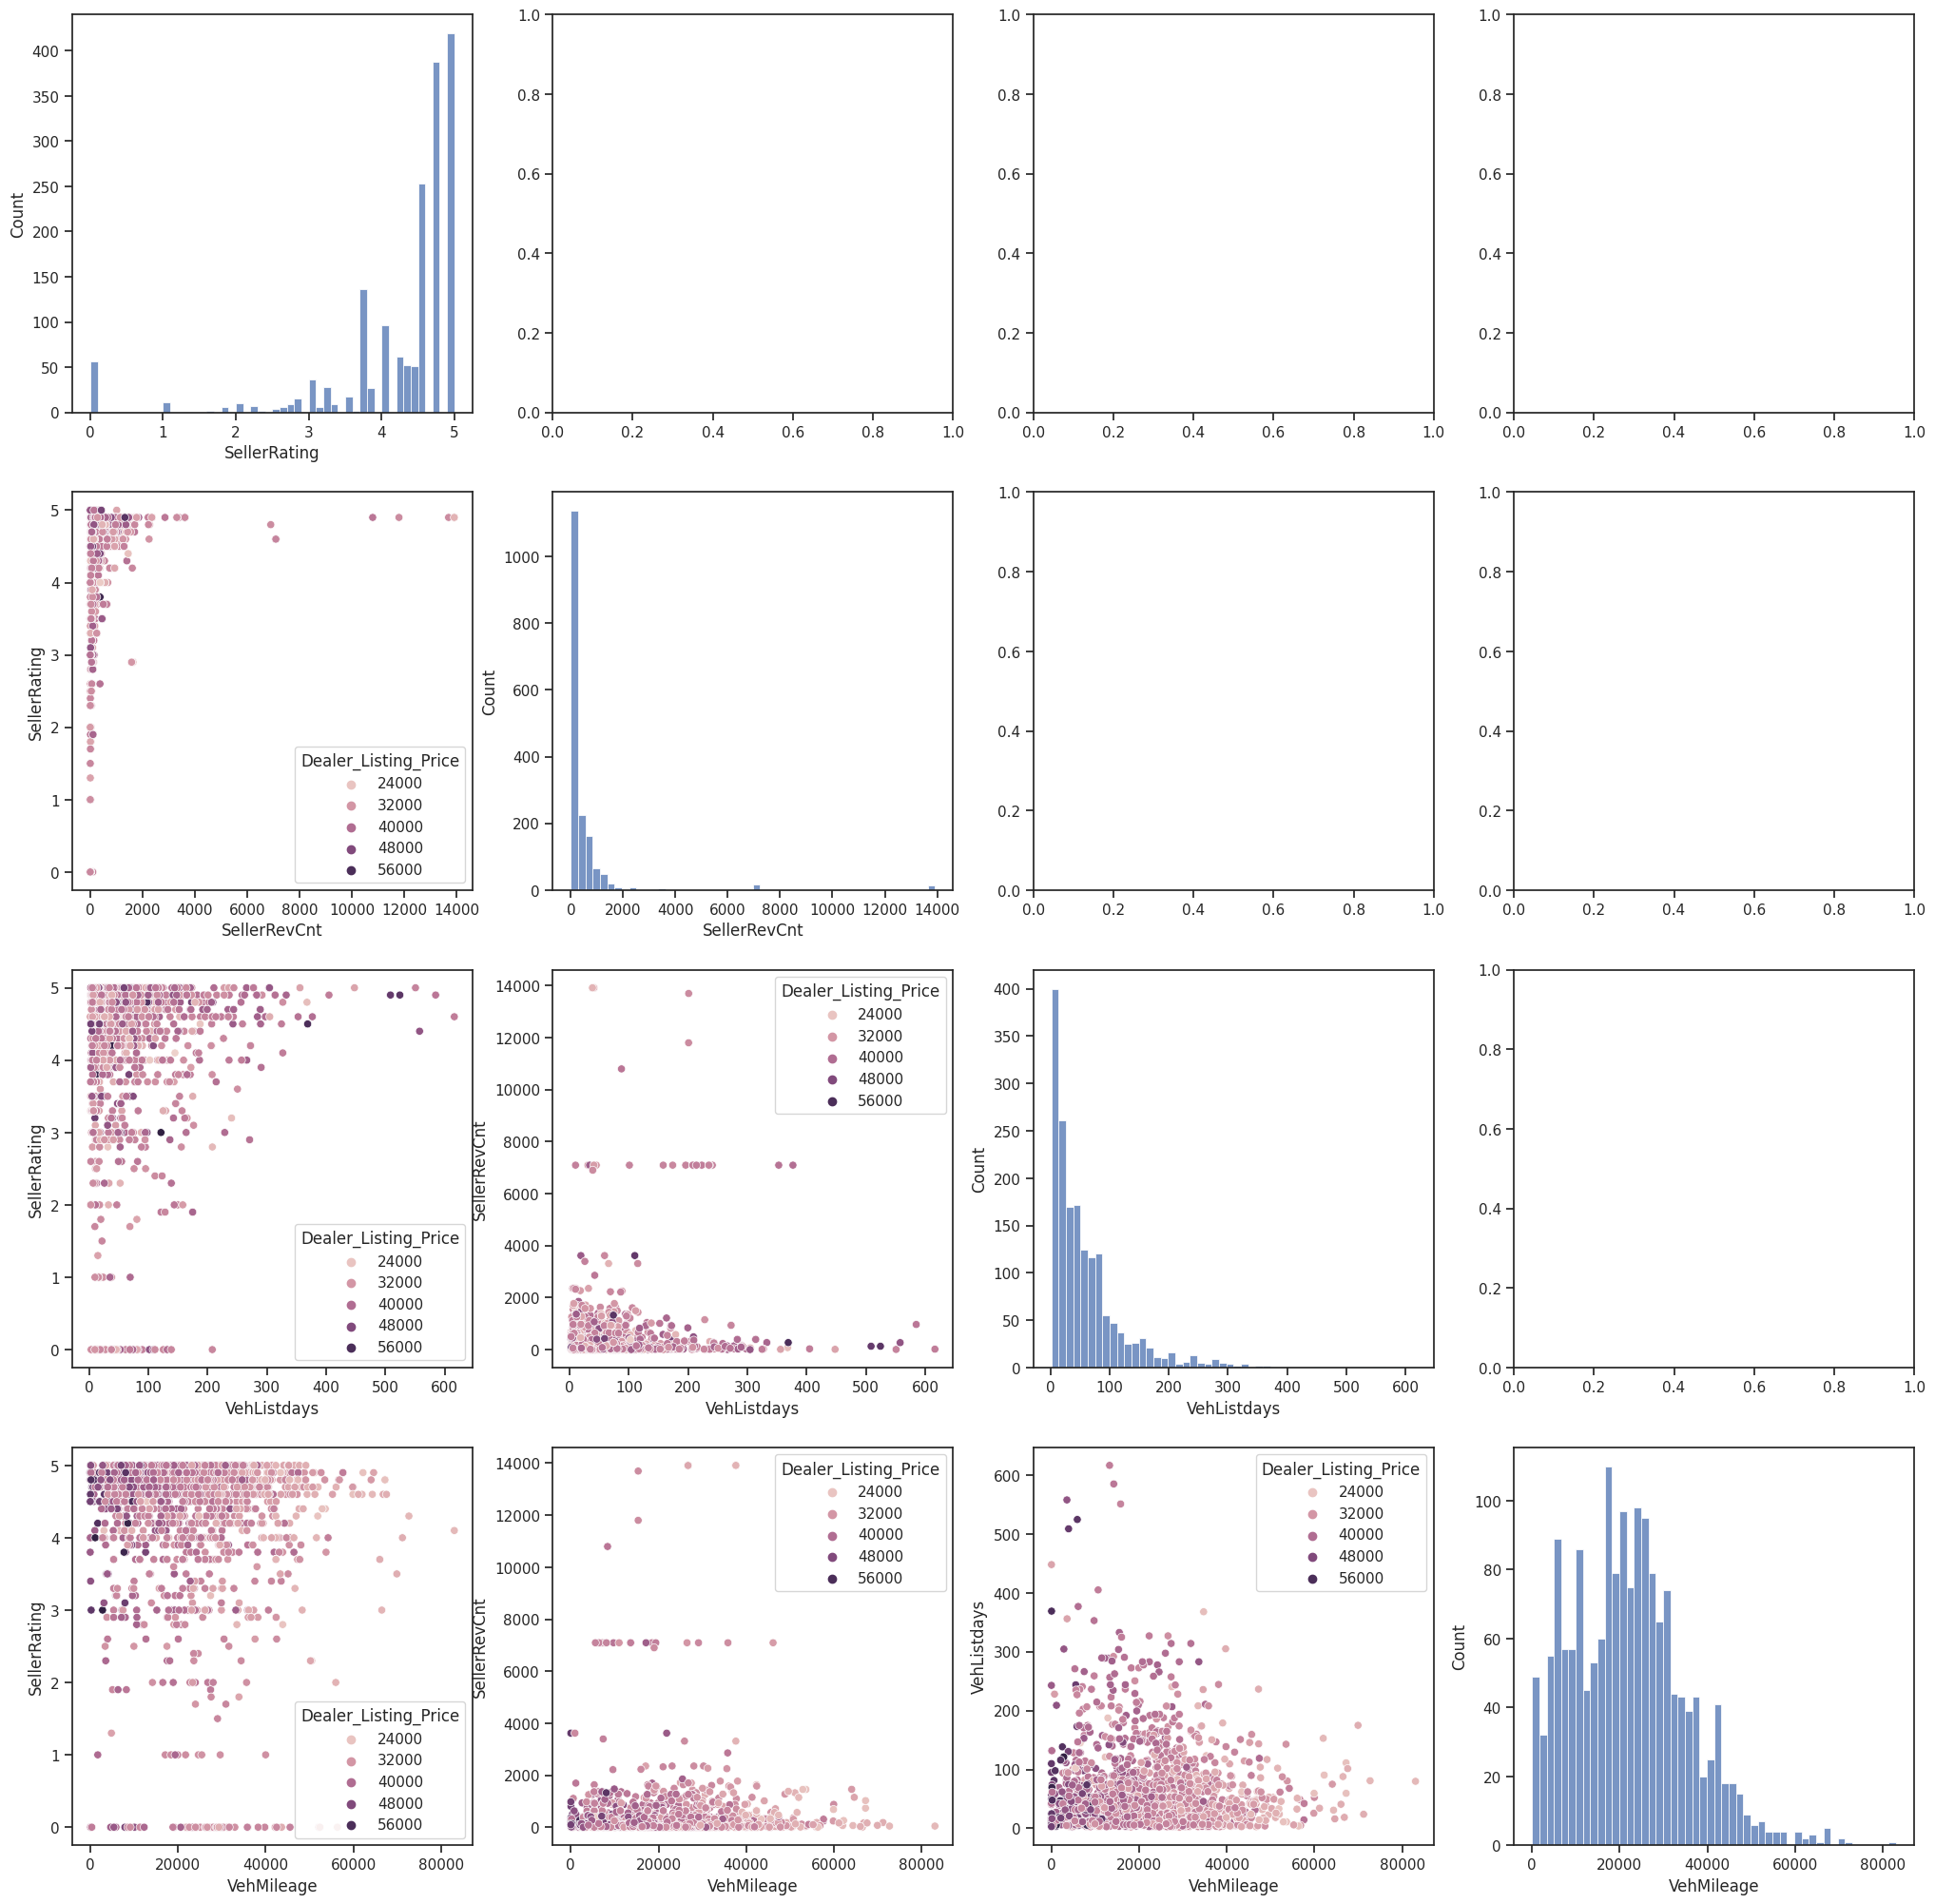

In [128]:
fig, axs = plt.subplots(
    ncols=len(cont_cols), 
    nrows=len(cont_cols), 
    figsize=(25, 25)
)
for i in range(len(cont_cols)):
    for j in range(i+1):
        if i == j:
            sns.histplot(
                data=ndf_xt5, 
                x=cont_cols[i],
                bins=50, 
                ax=axs[i][i]
                )
        else:
            sns.scatterplot(
                data=ndf_xt5,
                x=cont_cols[i], 
                y=cont_cols[j], 
                hue="Dealer_Listing_Price", 
                # palette='dark',
                legend=True, 
                ax=axs[i][j]
                )

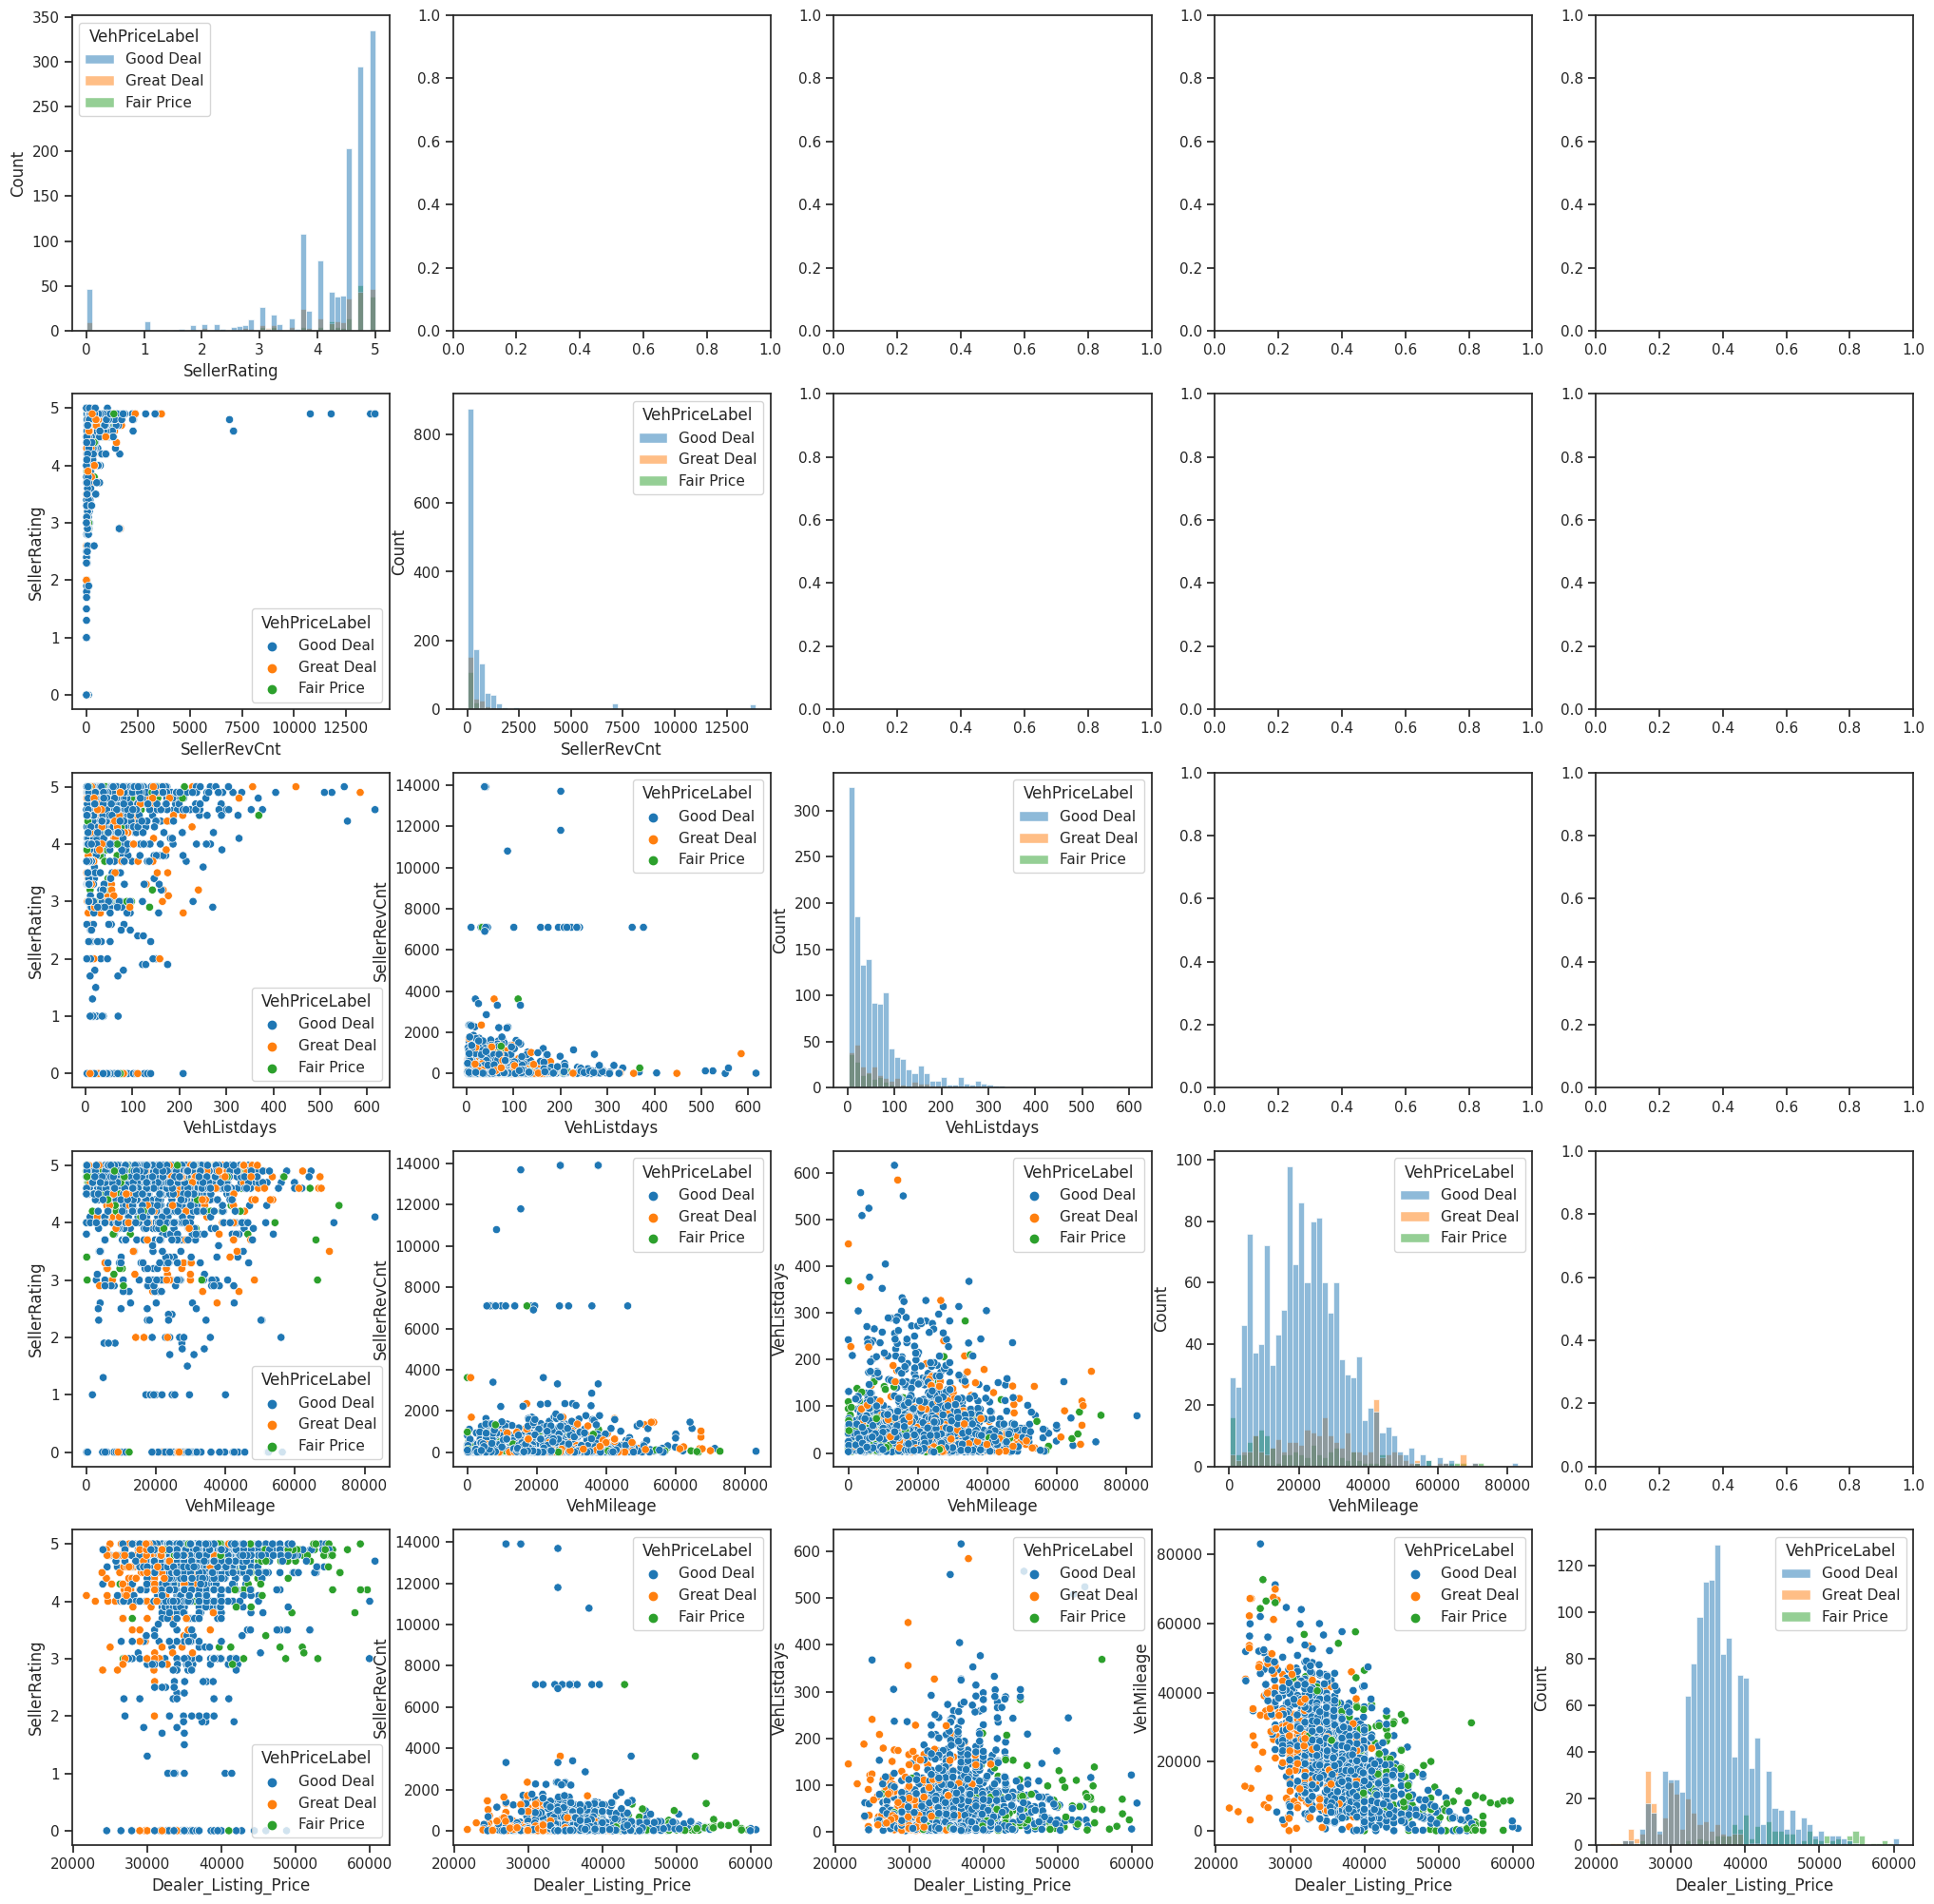

In [129]:
cont_cols = ['SellerRating', 'SellerRevCnt', 'VehListdays', 'VehMileage', "Dealer_Listing_Price"]
fig, axs = plt.subplots(ncols=len(cont_cols), nrows=len(cont_cols), figsize=(25,25))
for i in range(len(cont_cols)):
    for j in range(i+1):
        if i == j:
            sns.histplot(
                data=ndf_xt5, 
                x=cont_cols[i], 
                hue="VehPriceLabel", 
                palette=sns.color_palette("tab10", 3),  
                bins=50, 
                ax=axs[i][i]
                )
        else:
            sns.scatterplot(
                data=ndf_xt5,
                x=cont_cols[i], 
                y=cont_cols[j], 
                hue=df_xt5["VehPriceLabel"], 
                palette=sns.color_palette("tab10", 3),
                legend=True, 
                ax=axs[i][j]
                )

In [130]:
df_xt5["VehCertified"].value_counts()

VehCertified
False    1390
True      709
Name: count, dtype: int64

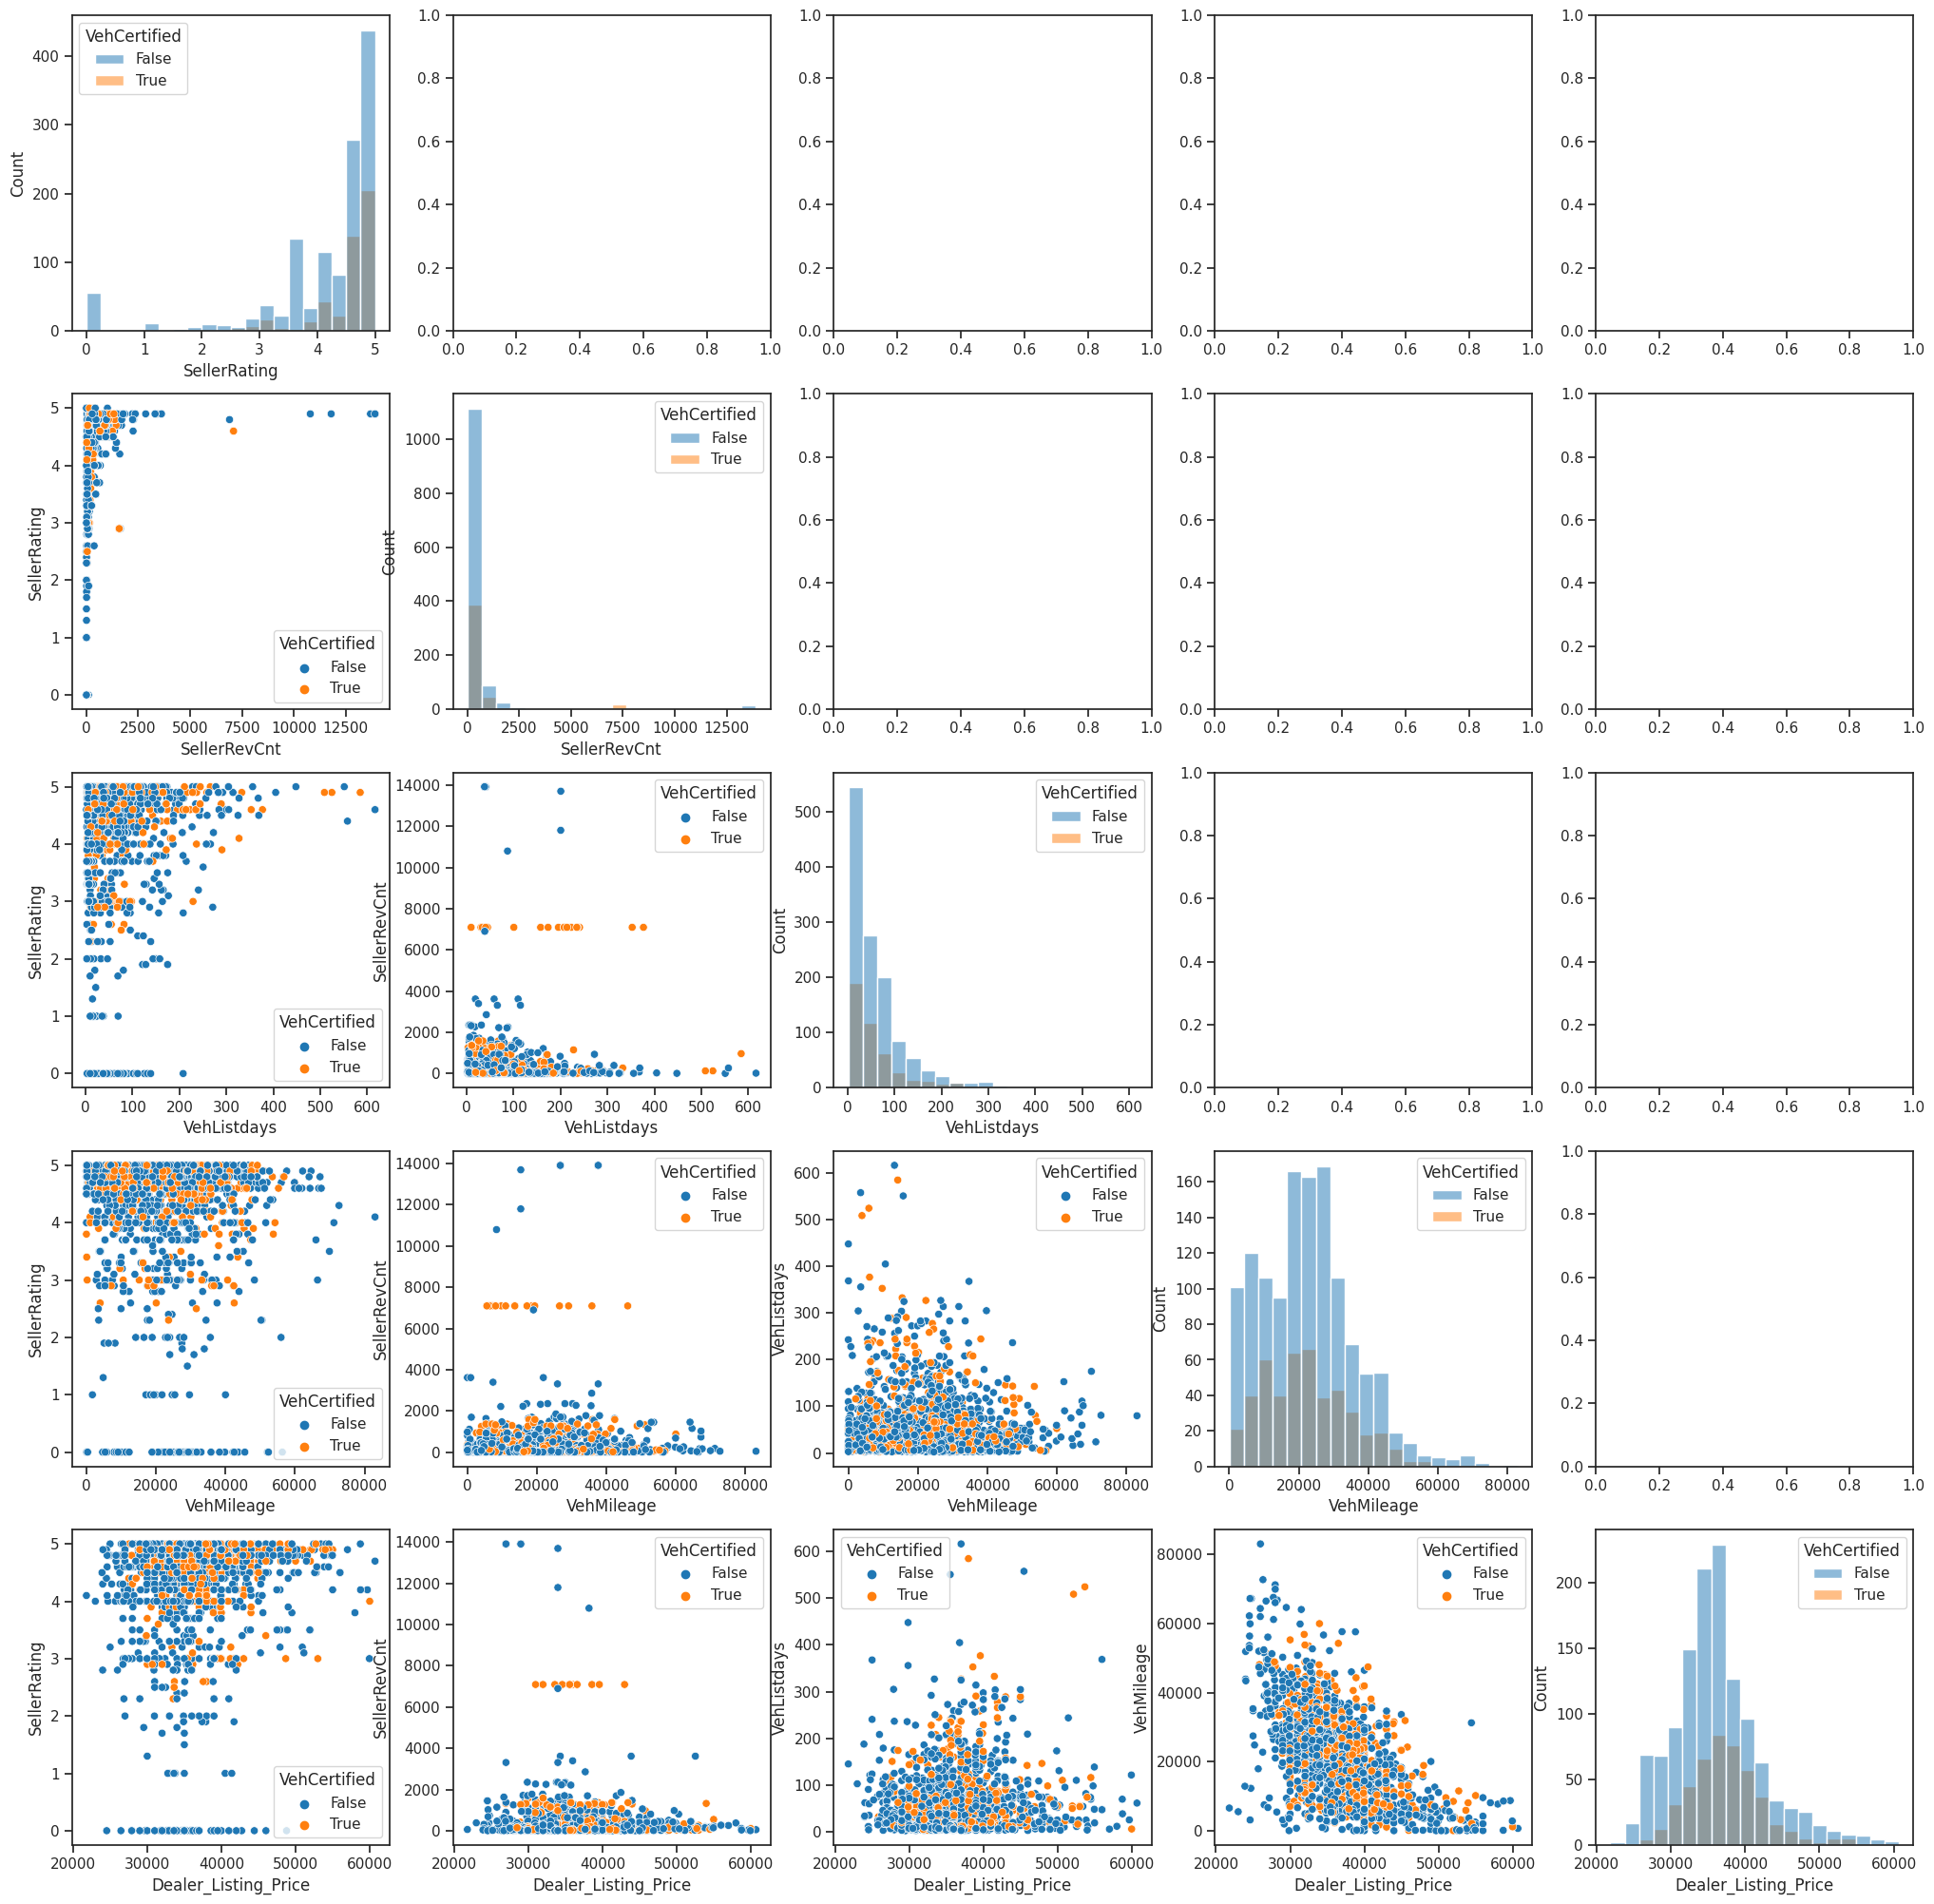

In [131]:
cont_cols = ['SellerRating', 'SellerRevCnt', 'VehListdays', 'VehMileage', "Dealer_Listing_Price"]
fig, axs = plt.subplots(ncols=len(cont_cols), nrows=len(cont_cols), figsize=(25,25))
for i in range(len(cont_cols)):
    for j in range(i+1):
        if i == j:
            sns.histplot(
                data=ndf_xt5,
                x=cont_cols[i],
                hue="VehCertified", 
                palette=sns.color_palette("tab10", 2),
                bins=20,
                ax=axs[i][i]
                )
        else:
            sns.scatterplot(
                data=ndf_xt5,
                x=cont_cols[i], 
                y=cont_cols[j], 
                hue="VehCertified", 
                palette=sns.color_palette("tab10", 2),
                legend=True, 
                ax=axs[i][j]
                )

In [132]:
ndf_xt5["VehYear"].value_counts()

VehYear
2018    851
2017    788
2019     75
Name: count, dtype: int64

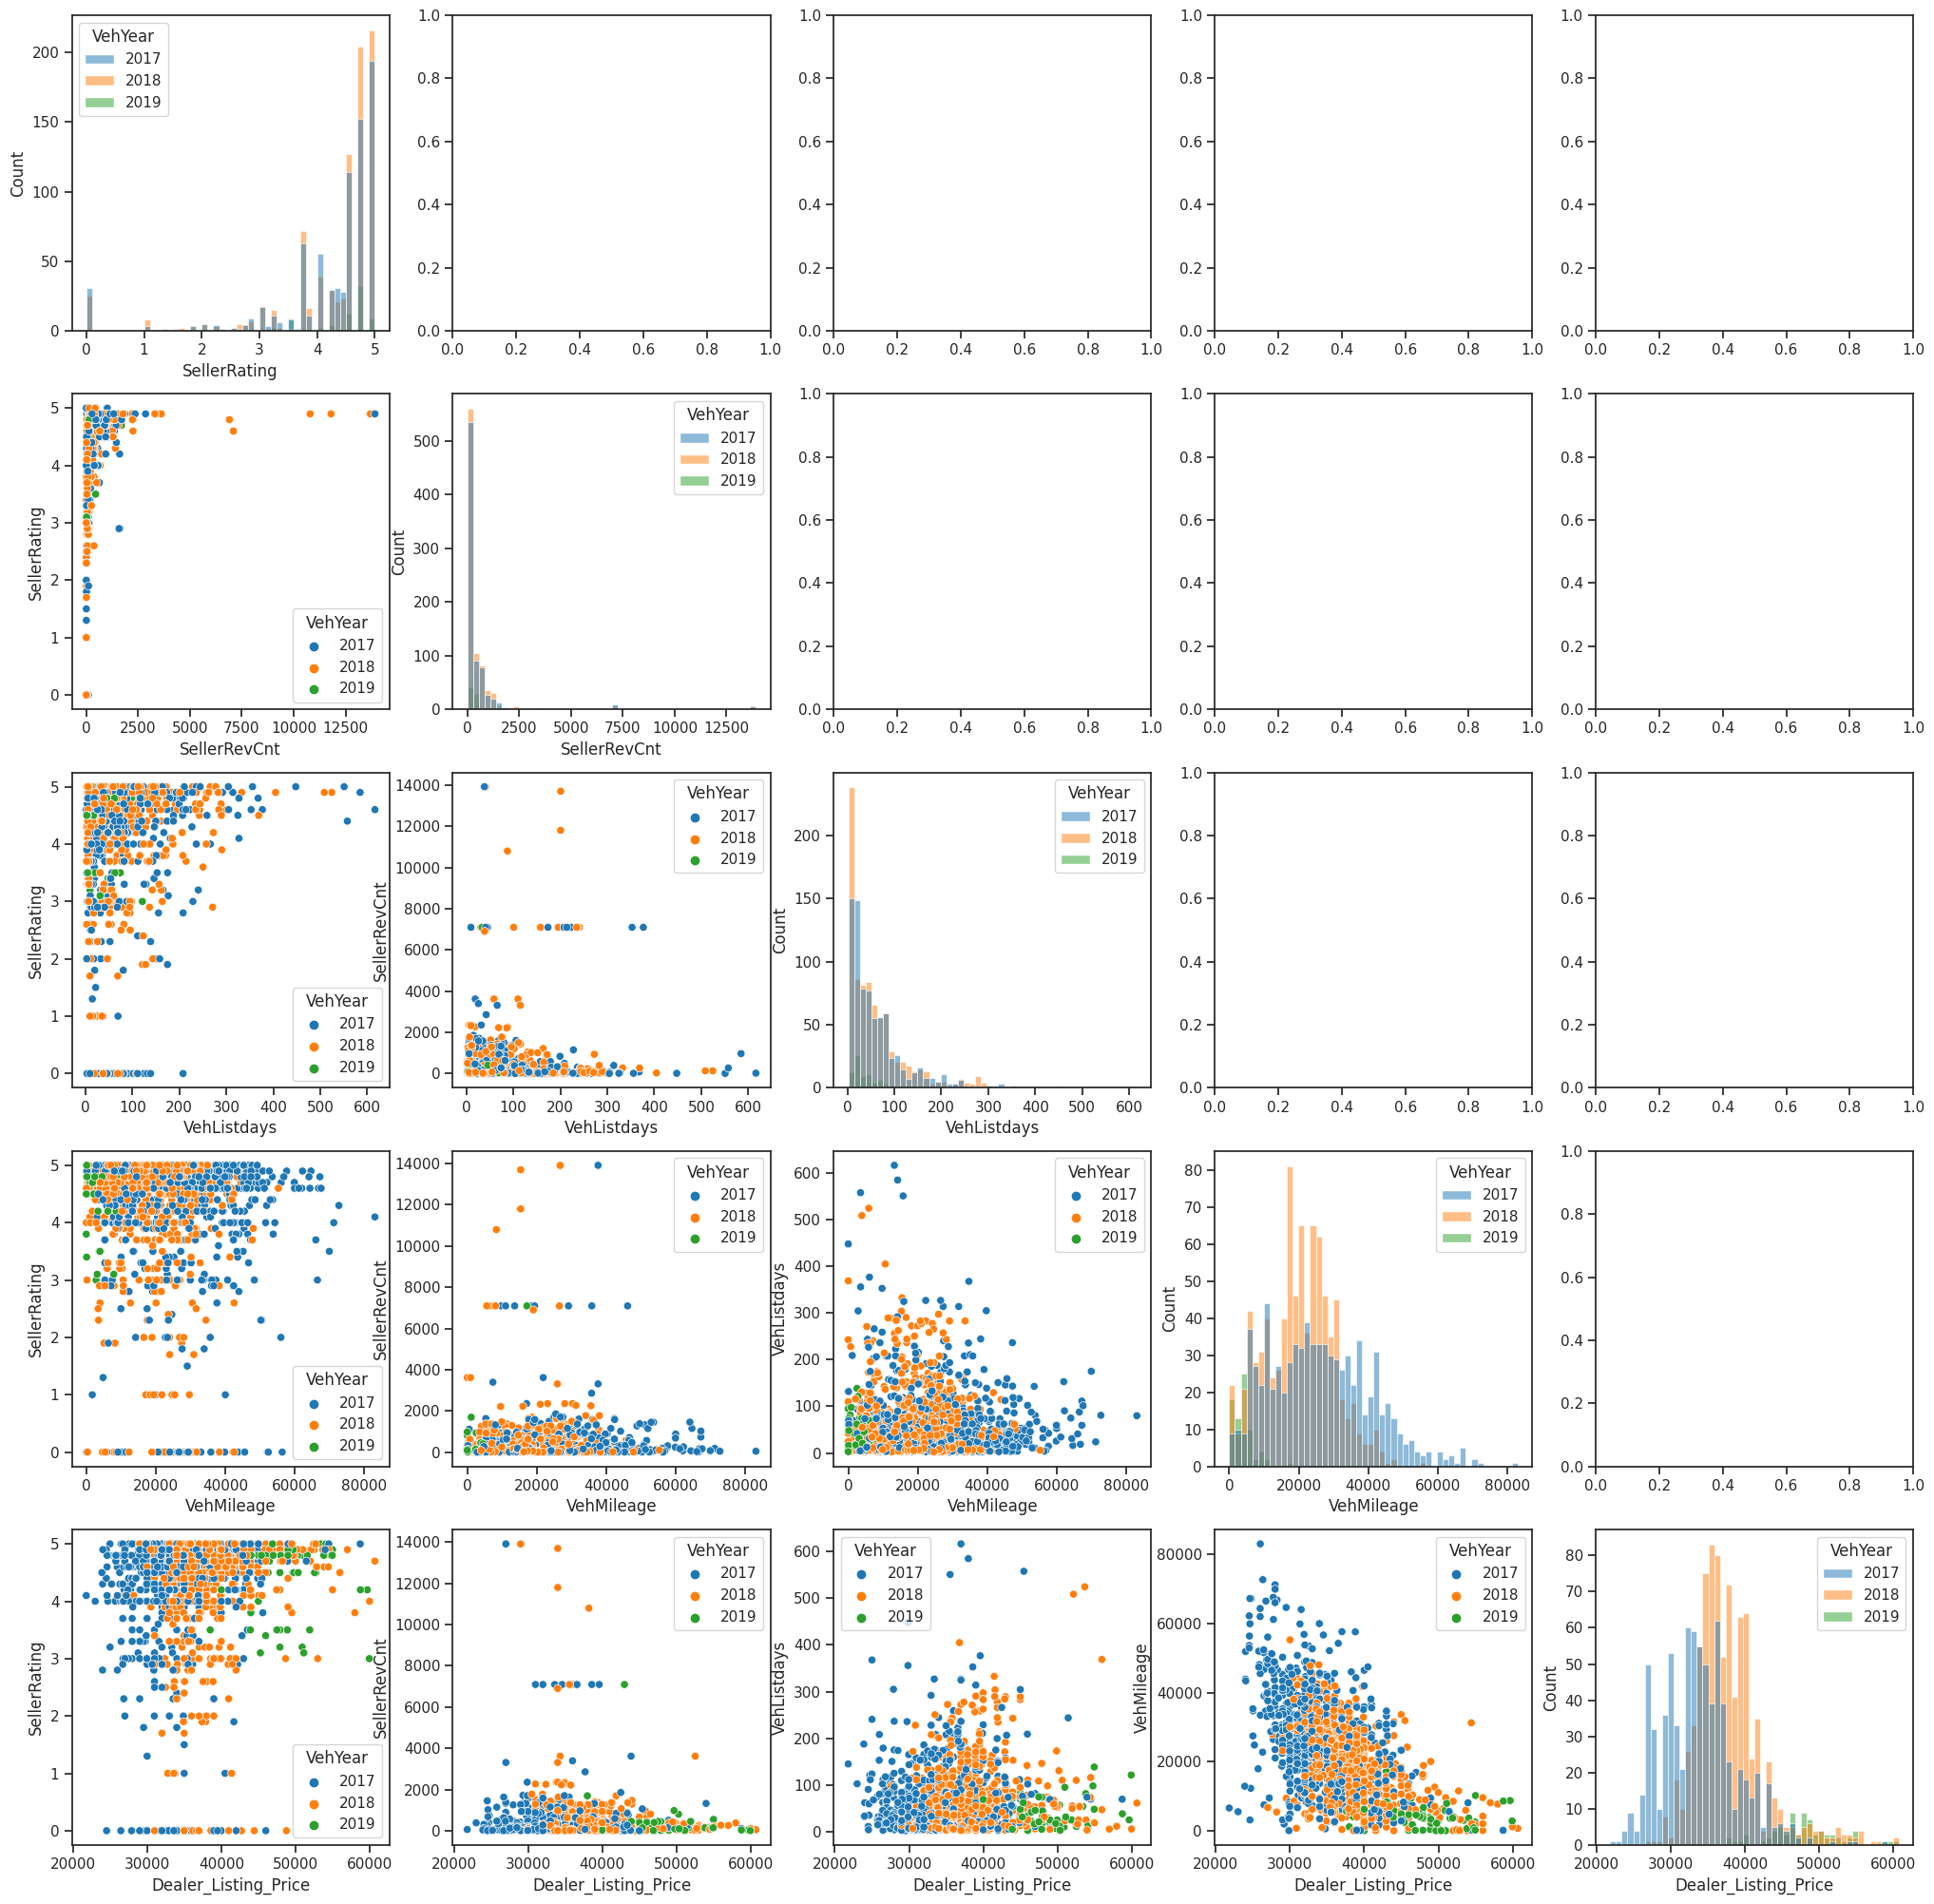

In [133]:
cont_cols = ['SellerRating', 'SellerRevCnt', 'VehListdays', 'VehMileage', "Dealer_Listing_Price"]
fig, axs = plt.subplots(ncols=len(cont_cols), nrows=len(cont_cols), figsize=(25,25))
for i in range(len(cont_cols)):
    for j in range(i+1):
        if i == j:
            sns.histplot(
                data=ndf_xt5, 
                x=cont_cols[i], 
                hue="VehYear", 
                palette=sns.color_palette("tab10", 3),  
                bins=50, 
                ax=axs[i][i]
                )
        else:
            sns.scatterplot(
                data=ndf_xt5,
                x=cont_cols[i], 
                y=cont_cols[j], 
                hue="VehYear", 
                palette=sns.color_palette("tab10", 3),
                legend=True, 
                ax=axs[i][j]
                )

In [134]:
cont_cols = ['SellerRating', 'SellerRevCnt', 'VehListdays', 'VehMileage', "Dealer_Listing_Price"]
ndf_xt5[cont_cols].corr()

,SellerRating,SellerRevCnt,VehListdays,VehMileage,Dealer_Listing_Price
SellerRating,1.000000,0.118765,0.077273,-0.041702,0.117300
SellerRevCnt,0.118765,1.000000,0.055452,0.018120,-0.118516
VehListdays,0.077273,0.055452,1.000000,-0.085237,0.064522
VehMileage,-0.041702,0.018120,-0.085237,1.000000,-0.585526
Dealer_Listing_Price,0.117300,-0.118516,0.064522,-0.585526,1.000000


In [141]:
feature_lst = []
for feat in  ndf_xt5['VehFeats']:
    # print(feat, type(feat))
    if isinstance(feat, str):
        feature_lst.extend([x[1:-1] for x in feat[1:-1].split(', ')])

In [142]:
def feature_transform(feature: str) -> str:
    if isinstance(feature, str):
        return ' '.join([x[1:-1] for x in feat[1:-1].split(', ')])
    else:
        return ''

In [320]:
trim_df = pd.DataFrame()
trim_df['VehFeats'] = ndf_xt5['VehFeats'].map(lambda x: ' '.join([_x[1:-1] for _x in x[1:-1].split(', ')]))
trim_df['VehSellerNotes'] = ndf_xt5['VehSellerNotes']
trim_df['VehColorExt'] = ndf_xt5['VehColorExt']
trim_df['VehDriveTrain'] = ndf_xt5['VehDriveTrain']
trim_df['data'] = trim_df['VehFeats'] # + ' ' + trim_df['VehSellerNotes'] + ' ' + trim_df['VehColorExt'] + ' ' + trim_df['VehDriveTrain']

In [321]:
trim_df['y'] = OrdinalEncoder().fit_transform(ndf_xt5[['Vehicle_Trim']])
trim_df['y'].value_counts()

y
7.0    700
2.0    573
0.0    147
5.0    123
4.0     49
1.0     47
9.0     35
3.0     19
6.0     12
8.0      9
Name: count, dtype: int64

In [322]:
trim_df.head()

,VehFeats,VehSellerNotes,VehColorExt,VehDriveTrain,data,y
4,4-Wheel Disc Brakes ABS Adjustable Steering Wh...,"Luxury, Exterior Parking Camera Rear, Front Du...",Radiant Silver Metallic,FWD,4-Wheel Disc Brakes ABS Adjustable Steering Wh...,2.0
14,20 Inch Alloy Wheels 3.6L V6 Engine Android Au...,"With Vroom, you can buy your next car from the...",Dark Granite Metallic,FWD,20 Inch Alloy Wheels 3.6L V6 Engine Android Au...,7.0
15,ABS Aluminum Wheels AUDIO SYSTEM FEATUREBOSE S...,"Recent Arrival! *CADILLAC CERTIFIED*, *CARFAX ...",Crystal White Tricoat,FWD,ABS Aluminum Wheels AUDIO SYSTEM FEATUREBOSE S...,2.0
18,1st and 2nd row curtain head airbags 4-wheel A...,CarMax makes car buying easy and hassle-free. ...,White,FWD,1st and 2nd row curtain head airbags 4-wheel A...,0.0
21,1st and 2nd row curtain head airbags 4-wheel A...,Outstanding design defines the 2018 Cadillac X...,Dark Granite Metallic,FWD,1st and 2nd row curtain head airbags 4-wheel A...,7.0


In [323]:
_ind = np.random.permutation(ndf_xt5.shape[0])
_n = int(0.9 * ndf_xt5.shape[0])
train_index, test_index = _ind[:_n], _ind[_n:]
train_index.shape, test_index.shape

((1542,), (172,))

In [324]:
train_df = trim_df.iloc[train_index]

In [325]:
count_vector = CountVectorizer()
tfidf_transformer = TfidfTransformer()

In [326]:
train_counts = count_vector.fit_transform(train_df['data'])

In [327]:
train_counts.shape

(1542, 703)

In [328]:
train_tfidf = tfidf_transformer.fit_transform(train_counts)

In [315]:
train_tfidf

<1542x7597 sparse matrix of type '<class 'numpy.float64'>'
	with 226920 stored elements in Compressed Sparse Row format>

In [329]:
clf = MultinomialNB().fit(train_tfidf, train_df['y'])

In [330]:
test_counts = count_vector.transform(trim_df.iloc[test_index]['data'])
test_tfidf = tfidf_transformer.transform(test_counts)
y_pred = clf.predict(test_tfidf)

In [331]:
y_pred

array([7., 7., 7., 7., 2., 7., 7., 7., 2., 7., 7., 7., 7., 7., 7., 2., 7.,
       2., 7., 2., 2., 2., 7., 7., 7., 2., 7., 2., 2., 7., 7., 7., 7., 7.,
       2., 7., 7., 2., 7., 7., 2., 2., 2., 7., 7., 2., 7., 7., 2., 2., 7.,
       0., 5., 4., 7., 7., 7., 7., 7., 2., 2., 7., 7., 7., 7., 7., 7., 7.,
       7., 2., 2., 7., 7., 7., 7., 7., 7., 2., 7., 2., 7., 2., 7., 2., 7.,
       7., 7., 5., 7., 7., 7., 7., 2., 7., 7., 7., 7., 7., 2., 2., 7., 2.,
       7., 7., 2., 7., 5., 2., 7., 7., 7., 2., 7., 2., 2., 2., 5., 7., 2.,
       7., 7., 7., 2., 0., 7., 7., 7., 7., 7., 7., 7., 7., 7., 2., 2., 7.,
       7., 2., 2., 2., 7., 2., 2., 7., 7., 7., 7., 7., 7., 2., 7., 7., 7.,
       2., 7., 7., 2., 4., 7., 2., 4., 7., 7., 7., 5., 7., 2., 7., 7., 7.,
       7., 7.])

In [332]:
confusion_matrix(y_pred, trim_df.iloc[test_index]['y'])

array([[ 1,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [12,  0, 26,  3,  0,  0,  0,  9,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  1,  1,  0,  0,  1,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  5,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 2,  6, 28,  0,  3,  8,  1, 61,  3],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0]])